In [2]:
import theano.tensor as T

In [3]:
c = T.scalar('c')
v = T.vector('v')
A = T.matrix('A')

In [4]:
w = A.dot(v)

In [5]:
import theano

In [6]:
matrix_times_vector = theano.function(inputs=[A,v], outputs=w)

In [7]:
import numpy as np
A_val = np.array([[1,2], [3,4]])
v_val = np.array([5,6])

w_val = matrix_times_vector(A_val, v_val)
w_val

array([17., 39.])

In [8]:
x = theano.shared(20.0, 'x')

In [9]:
cost = x*x + x + 1 

In [10]:
x_update = x - 0.3 * T.grad(cost, x)

In [11]:
train = theano.function(inputs=[], outputs=cost, updates=[(x, x_update)])

In [12]:
for i in range(25):
  cost_val = train()
  print(cost_val)
  
print(x.get_value())

421.0
67.99000000000001
11.508400000000002
2.4713440000000007
1.0254150400000002
0.7940664064
0.7570506250240001
0.75112810000384
0.7501804960006143
0.7500288793600982
0.7500046206976159
0.7500007393116186
0.750000118289859
0.7500000189263775
0.7500000030282203
0.7500000004845152
0.7500000000775223
0.7500000000124035
0.7500000000019845
0.7500000000003176
0.7500000000000506
0.7500000000000082
0.7500000000000013
0.7500000000000001
0.7500000000000001
-0.4999999976919052


In [13]:
import matplotlib.pyplot as plt

x_axis = np.arange(-25, 25, 0.1)

def cost(x):
  return x*x + x +1 

def derivative_cost(x):
  return 2*x + 1

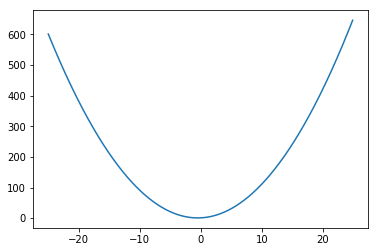

In [14]:
plt.plot(x_axis, cost(x_axis))

In [15]:
x = 20
cost(20)

421

In [16]:
derivative_of_cost_wrt_x = derivative_cost(x)
learning_rate = 0.3
x_update = x - learning_rate * derivative_of_cost_wrt_x
x_update

7.700000000000001

In [17]:
cost(x_update)

67.99000000000001

## Neural Network

In [18]:
import numpy as np
import theano
import theano.tensor as T
import pandas as pd

In [19]:
"""Takes in raw X, subtracts mean, and divides by standard deviation"""
def get_normalized_data():
    print("Reading in and transforming data...")
    df = pd.read_csv('../../../data/MNIST/train.csv')
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    X = (X - mu) / std # normalize the data
    Y = data[:, 0]
    return X, Y
  
"""Function that creates an indicator matrix from y (one hot encoding)"""
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind
  
def error_rate(p, t):
  return np.mean(p != t)

def relu(a):
  return a * (a > 0)

Reading in and transforming data...
Cost / err at iteration i=0, j=0: 2348.601 / 0.834
Cost / err at iteration i=0, j=10: 1760.432 / 0.513
Cost / err at iteration i=0, j=20: 1430.914 / 0.371
Cost / err at iteration i=0, j=30: 1214.083 / 0.299
Cost / err at iteration i=0, j=40: 1065.107 / 0.264
Cost / err at iteration i=0, j=50: 952.073 / 0.234
Cost / err at iteration i=0, j=60: 864.573 / 0.212
Cost / err at iteration i=0, j=70: 796.329 / 0.199
Cost / err at iteration i=0, j=80: 739.204 / 0.183
Cost / err at iteration i=1, j=0: 728.796 / 0.181
Cost / err at iteration i=1, j=10: 684.577 / 0.171
Cost / err at iteration i=1, j=20: 646.641 / 0.161
Cost / err at iteration i=1, j=30: 612.215 / 0.153
Cost / err at iteration i=1, j=40: 585.471 / 0.153
Cost / err at iteration i=1, j=50: 561.079 / 0.144
Cost / err at iteration i=1, j=60: 539.854 / 0.136
Cost / err at iteration i=1, j=70: 521.336 / 0.134
Cost / err at iteration i=1, j=80: 503.479 / 0.130
Cost / err at iteration i=2, j=0: 500.442 /

Cost / err at iteration i=17, j=60: 209.732 / 0.063
Cost / err at iteration i=17, j=70: 209.422 / 0.061
Cost / err at iteration i=17, j=80: 209.056 / 0.061
Cost / err at iteration i=18, j=0: 209.299 / 0.060
Cost / err at iteration i=18, j=10: 208.346 / 0.062
Cost / err at iteration i=18, j=20: 208.313 / 0.060
Cost / err at iteration i=18, j=30: 207.494 / 0.061
Cost / err at iteration i=18, j=40: 206.834 / 0.061
Cost / err at iteration i=18, j=50: 205.965 / 0.060
Cost / err at iteration i=18, j=60: 205.999 / 0.061
Cost / err at iteration i=18, j=70: 205.697 / 0.059
Cost / err at iteration i=18, j=80: 205.378 / 0.060
Cost / err at iteration i=19, j=0: 205.627 / 0.060
Cost / err at iteration i=19, j=10: 204.720 / 0.060
Cost / err at iteration i=19, j=20: 204.725 / 0.059
Cost / err at iteration i=19, j=30: 203.960 / 0.061
Cost / err at iteration i=19, j=40: 203.330 / 0.060
Cost / err at iteration i=19, j=50: 202.467 / 0.060
Cost / err at iteration i=19, j=60: 202.517 / 0.060
Cost / err at 

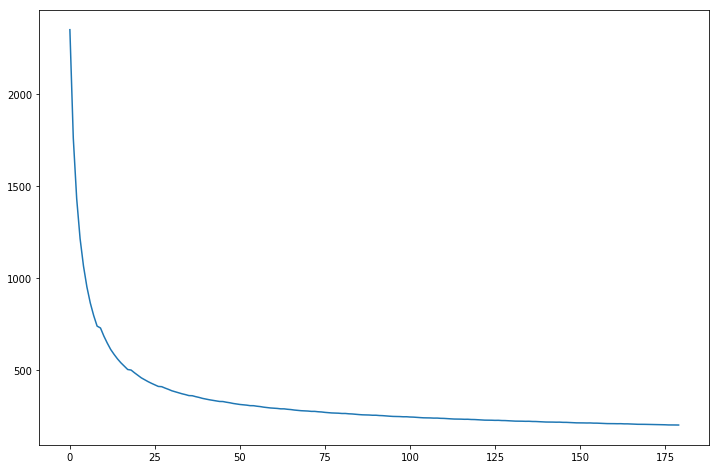

In [21]:
def main():
  X, Y = get_normalized_data()
  
  max_iter = 20
  print_period = 10
  
  lr = 0.00004
  reg = 0.01
  
  Xtrain = X[:-1000,]
  Ytrain = Y[:-1000]
  Xtest  = X[-1000:,]
  Ytest  = Y[-1000:]
  Ytrain_ind = y2indicator(Ytrain)
  Ytest_ind = y2indicator(Ytest)
  
  N, D = Xtrain.shape
  batch_sz = 500
  n_batches = N // batch_sz
  
  M = 300   # 300 hidden units
  K = 10    # 10 classes 
  W1_init = np.random.randn(D, M) / np.sqrt(D)
  b1_init = np.zeros(M)
  W2_init = np.random.randn(M, K) / np.sqrt(M)
  b2_init = np.zeros(K)
  
  """------------- Step 2: Define theano variables and expressions ---------------"""
  thX = T.matrix('X')                  # Placeholder for X input matrix
  thT = T.matrix('T')                  # Placeholder for the targets
  W1 = theano.shared(W1_init, 'W1')    # All parameters will be shared variables
  b1 = theano.shared(b1_init, 'b1')    # Shared variable: first arg is initial value
  W2 = theano.shared(W2_init, 'W2')    # second arg is name
  b2 = theano.shared(b2_init, 'b2')
  
  thZ = relu( thX.dot(W1) + b1)                # Create function to solve for Z using relu
  thY = T.nnet.softmax( thZ.dot(W2) + b2)      # Create function to solve for Y using softmax
  
  cost = ( -(thT * T.log(thY)).sum() + reg*((W1*W1).sum() + 
                                            (b1*b1).sum() + (W2*W2).sum() + (b2*b2).sum()))
  prediction = T.argmax(thY, axis=1)
  
  """------------- Step 3: Create training/update expressions ---------------"""
  update_W1 = W1 - lr*T.grad(cost, W1)
  update_b1 = b1 - lr*T.grad(cost, b1)
  update_W2 = W2 - lr*T.grad(cost, W2)
  update_b2 = b2 - lr*T.grad(cost, b2)
  
  # Now we create our train function. Takes in placeholder for X input matrix and 
  # placeholder for targets matrix 
  train = theano.function(
    inputs=[thX, thT],
    updates=[(W1, update_W1), (b1, update_b1), (W2, update_W2), (b2, update_b2)]
  )
  
  # Create a function to get prediction because we want to do it over the whole dataset
  get_prediction = theano.function(
    inputs = [thX, thT],
    outputs = [cost, prediction],
  )
  
  # Training Loop
  costs = []
  for i in range(max_iter):
      for j in range(n_batches):
          Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
          Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
  
          train(Xbatch, Ybatch)     # Calling the train function we created
          if j % print_period == 0:
            # calling in prediction function we created to get cost and prediction
            cost_val, prediction_val = get_prediction(Xtest, Ytest_ind)
            err = error_rate(prediction_val, Ytest)
            print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, cost_val, err))
            costs.append(cost_val)
            
  fig, ax = plt.subplots(figsize=(12,8))
  plt.plot(costs)
  plt.show()
if __name__ == '__main__':
  main()